Problem Statement:   

The Mail & Guardian is a quality investigative and comment news publication, based on a culture of editorial independence and excellence. It consists of two methods of article accessibility namely, Subscription and Membership. 

Membership: Members sign up and get access to limited free articles. 

Subscription: Subscribers get access to unlimited articles by paying a monthly subscription fee.


Aim:

The aim is to find a way to get members to subscribe to the monthly newsletters by observing how frequent they visit the website. 
Since subscribers pay monthly, they should get premium and informative articles which are worth paying for.

LOAD DEPENDENCIES

Loading required python packages.

In [1]:
#Getting all the packages we need: 
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #statist graph package
import matplotlib.cm as cm
import matplotlib.pyplot as plt #plot package
import matplotlib.pylab as plt
import pandasql as ps #sql package
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

LOADING DATASETS

Loading data sets which is subsetted into the year 2021

In [3]:
#Specify credentials to connect to BigQuery
sql = "SELECT * FROM `mag-mag-mcs.mag_mag_mcs.wp_posts_2021_tmp`"
project_id = 'mag-mag-mcs'# Load in the data to pandas
df_tmp_2021 = pd.read_gbq(sql, project_id=project_id, dialect='standard')

Loading data sets which is subsetted into the year 2020

In [4]:
#Specify credentials to connect to BigQuery
sql = "SELECT * FROM `mag-mag-mcs.mag_mag_mcs.wp_posts_publish_2020_tmp`"
project_id = 'mag-mag-mcs'# Load in the data to pandas
df_tmp_2020 = pd.read_gbq(sql, project_id=project_id, dialect='standard')


Viewing the first 5 rows of the datasets

In [12]:
df_tmp_2021.head(5)

,id,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,...,pinged,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,500604.0,0.0,2021-10-01 07:20:01+00:00,2021-10-01 05:20:01+00:00,"<iframe title=""[Audio described] Google for Ed...",,,publish,closed,closed,...,,2021-10-01 07:20:01+00:00,2021-10-01 05:20:01+00:00,,0.0,https://mg.co.za/article/2021-10-01-9739fcf513...,0,oembed_cache,,0
1,370557.0,3.0,2021-01-08 01:35:05+00:00,2021-01-07 23:35:05+00:00,<!-- wp:heading -->\n<h2>The Digital Edition i...,08 January 2021,,publish,closed,closed,...,,2021-01-08 01:37:50+00:00,2021-01-07 23:37:50+00:00,,0.0,https://mg.co.za/?p=370557,0,post,,0
2,370685.0,3.0,2021-01-11 19:50:00+00:00,2021-01-11 17:50:00+00:00,"<!-- wp:embed {""url"":""https://www.youtube.com/...",Watch it again: Ramaphosa addresses the nation,The president is set to speak on developments ...,publish,closed,closed,...,,2021-01-12 16:46:39+00:00,2021-01-12 14:46:39+00:00,,0.0,https://mg.co.za/?p=370685,0,post,,0
3,370940.0,3.0,2021-01-15 00:22:51+00:00,2021-01-14 22:22:51+00:00,<!-- wp:heading -->\n<h2>The Digital Edition i...,15 January 2021,,publish,closed,closed,...,,2021-01-15 00:23:10+00:00,2021-01-14 22:23:10+00:00,,0.0,https://mg.co.za/?p=370940,0,post,,0
4,371342.0,3.0,2021-01-22 03:50:08+00:00,2021-01-22 01:50:08+00:00,<!-- wp:heading -->\n<h2>The Digital Edition i...,22 January 2021,,publish,closed,closed,...,,2021-01-22 03:50:32+00:00,2021-01-22 01:50:32+00:00,,0.0,https://mg.co.za/?p=371342,0,post,,0


In [13]:
df_tmp_2020.head(5)

,id,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,...,pinged,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,267813.0,0.0,2020-02-06 01:57:38+00:00,2020-02-05 23:57:38+00:00,{{unknown}},,,publish,closed,closed,...,,2020-02-06 01:57:38+00:00,2020-02-05 23:57:38+00:00,,0.0,https://mg.co.za/article/2020-02-06-0d1d6cd736...,0,oembed_cache,,0
1,268684.0,0.0,2020-02-06 05:06:37+00:00,2020-02-06 03:06:37+00:00,{{unknown}},,,publish,closed,closed,...,,2020-02-06 05:06:37+00:00,2020-02-06 03:06:37+00:00,,0.0,https://mg.co.za/article/2020-02-06-160d666a4a...,0,oembed_cache,,0
2,267814.0,0.0,2020-02-06 01:57:39+00:00,2020-02-05 23:57:39+00:00,{{unknown}},,,publish,closed,closed,...,,2020-02-06 01:57:39+00:00,2020-02-05 23:57:39+00:00,,0.0,https://mg.co.za/article/2020-02-06-2a228caf76...,0,oembed_cache,,0
3,267738.0,0.0,2020-02-06 01:42:27+00:00,2020-02-05 23:42:27+00:00,{{unknown}},,,publish,closed,closed,...,,2020-02-06 01:42:27+00:00,2020-02-05 23:42:27+00:00,,0.0,https://mg.co.za/article/2020-02-06-329ed5f948...,0,oembed_cache,,0
4,267846.0,0.0,2020-02-06 02:06:19+00:00,2020-02-06 00:06:19+00:00,{{unknown}},,,publish,closed,closed,...,,2020-02-06 02:06:19+00:00,2020-02-06 00:06:19+00:00,,0.0,https://mg.co.za/article/2020-02-06-361932cb2b...,0,oembed_cache,,0


Shape of the datasets

In [14]:
df_tmp_2021.shape

(24442, 23)

In [29]:
print(f' The dataset contains {df_tmp_2021.shape[0]} observation, from wich we have {df_tmp_2021.shape[1]} attributes')

 The dataset contains 24442 observation, from wich we have 23 attributes


In [15]:
df_tmp_2020.shape

(17108, 23)

In [30]:
print(f' The dataset contains {df_tmp_2020.shape[0]} observation, from wich we have {df_tmp_2020.shape[1]} attributes')

 The dataset contains 17108 observation, from wich we have 23 attributes


Viewing the columns

In [19]:
df_tmp_2021.columns

Index(['id', 'post_author', 'post_date', 'post_date_gmt', 'post_content',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_password', 'post_name', 'to_ping', 'pinged',
       'post_modified', 'post_modified_gmt', 'post_content_filtered',
       'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type',
       'comment_count'],
      dtype='object')

In [20]:
df_tmp_2020.columns

Index(['id', 'post_author', 'post_date', 'post_date_gmt', 'post_content',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_password', 'post_name', 'to_ping', 'pinged',
       'post_modified', 'post_modified_gmt', 'post_content_filtered',
       'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type',
       'comment_count'],
      dtype='object')

###

In [21]:
df_tmp_2021.nunique(axis=0)

id                       24442
post_author                 29
post_date                22232
post_date_gmt            22188
post_content              6474
post_title               16945
post_excerpt              7347
post_status                  8
comment_status               1
ping_status                  1
post_password                1
post_name                22312
to_ping                      1
pinged                       1
post_modified            24273
post_modified_gmt        24254
post_content_filtered        1
post_parent               4734
guid                     23881
menu_order                  14
post_type                   13
post_mime_type              11
comment_count                1
dtype: int64

In [22]:
df_tmp_2020.nunique(axis=0)

id                       17108
post_author                 40
post_date                15535
post_date_gmt            15541
post_content              8042
post_title               15969
post_excerpt              6923
post_status                  1
comment_status               2
ping_status                  2
post_password                1
post_name                17101
to_ping                      1
pinged                       1
post_modified            16906
post_modified_gmt        16906
post_content_filtered        1
post_parent                  4
guid                     16977
menu_order                  14
post_type                   10
post_mime_type               1
comment_count                1
dtype: int64

Checking for nulls

In [17]:
df_tmp_2021.isnull().sum().sort_values(ascending = False)

post_date_gmt            50
post_modified_gmt        19
id                        0
to_ping                   0
post_mime_type            0
post_type                 0
menu_order                0
guid                      0
post_parent               0
post_content_filtered     0
post_modified             0
pinged                    0
post_name                 0
post_author               0
post_password             0
ping_status               0
comment_status            0
post_status               0
post_excerpt              0
post_title                0
post_content              0
post_date                 0
comment_count             0
dtype: int64

In [18]:
df_tmp_2020.isnull().sum().sort_values(ascending = False)

id                       0
to_ping                  0
post_mime_type           0
post_type                0
menu_order               0
guid                     0
post_parent              0
post_content_filtered    0
post_modified_gmt        0
post_modified            0
pinged                   0
post_name                0
post_author              0
post_password            0
ping_status              0
comment_status           0
post_status              0
post_excerpt             0
post_title               0
post_content             0
post_date_gmt            0
post_date                0
comment_count            0
dtype: int64

Checking the datatypes and Statistical distributions of the datasets

In [57]:
df_tmp_2021.info()
df_tmp_2021.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24442 entries, 0 to 24441
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     24442 non-null  float64            
 1   post_author            24442 non-null  float64            
 2   post_date              24442 non-null  datetime64[ns, UTC]
 3   post_date_gmt          24392 non-null  datetime64[ns, UTC]
 4   post_content           24442 non-null  object             
 5   post_title             24442 non-null  object             
 6   post_excerpt           24442 non-null  object             
 7   post_status            24442 non-null  object             
 8   comment_status         24442 non-null  object             
 9   ping_status            24442 non-null  object             
 10  post_password          24442 non-null  object             
 11  post_name              24442 non-null  object         

,id,post_author,post_parent,menu_order,comment_count
count,24442.000000,24442.000000,24442.000000,24442.000000,24442.0
mean,420472.942885,2919.271623,164136.200966,0.006914,0.0
std,45568.490437,3427.832858,209427.443503,0.245063,0.0
min,19817.000000,0.000000,0.000000,0.000000,0.0
25%,380738.500000,3.000000,0.000000,0.000000,0.0
50%,411315.500000,11.000000,0.000000,0.000000,0.0
75%,448655.500000,6117.000000,406078.000000,0.000000,0.0
max,500966.000000,14575.000000,500965.000000,13.000000,0.0


We now know that the DataFrame we are working with has 23 columns with the data classes boolean, float, integer, and Python object. We can also see which columns have missing values and get a basic understanding of numerical data. Score, num comments, and total awards received columns have a distribution.

In [16]:
df_tmp_2020.info()
df_tmp_2020.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     17108 non-null  float64            
 1   post_author            17108 non-null  float64            
 2   post_date              17108 non-null  datetime64[ns, UTC]
 3   post_date_gmt          17108 non-null  datetime64[ns, UTC]
 4   post_content           17108 non-null  object             
 5   post_title             17108 non-null  object             
 6   post_excerpt           17108 non-null  object             
 7   post_status            17108 non-null  object             
 8   comment_status         17108 non-null  object             
 9   ping_status            17108 non-null  object             
 10  post_password          17108 non-null  object             
 11  post_name              17108 non-null  object         

,id,post_author,post_parent,menu_order,comment_count
count,17108.000000,17108.000000,17108.000000,17108.000000,17108.0
mean,386940.101473,2723.265198,12.474456,0.009878,0.0
std,46680.020376,3551.254762,1012.115270,0.292871,0.0
min,19817.000000,0.000000,0.000000,0.000000,0.0
25%,364363.750000,3.000000,0.000000,0.000000,0.0
50%,381231.500000,11.000000,0.000000,0.000000,0.0
75%,406049.000000,6117.000000,0.000000,0.000000,0.0
max,500951.000000,14575.000000,98014.000000,13.000000,0.0


We also use built-in statistical commands like mean(), sum(), max(), shape(), or Dtypes() to delve deeper into columns. These can be applied to the entire DataFrame as well as to each individual column.

Analysing the sentiments noticed in the datasets

Sentiments in the post_status column

In [23]:
df_tmp_2021.post_status.value_counts()

inherit       12819
publish       11504
draft            49
trash            36
auto-draft       16
pending          15
future            2
private           1
Name: post_status, dtype: int64

In [24]:
df_tmp_2020.post_status.value_counts()

publish    17108
Name: post_status, dtype: int64

Sentiments in the comment_status column

In [25]:
df_tmp_2021.comment_status.value_counts()

closed    24442
Name: comment_status, dtype: int64

In [26]:
df_tmp_2020.comment_status.value_counts()

closed    16968
open        140
Name: comment_status, dtype: int64

Sentiments in the post_author column which contains the Authors' Id and the number of articles they have written

In [31]:
df_tmp_2021.post_author.value_counts()

3.0        8847
6117.0     7324
11.0       4669
6164.0     1729
6176.0      835
10338.0     226
12196.0     192
12197.0     167
12394.0     133
1.0         105
12216.0      91
10070.0      70
13242.0      13
6129.0       12
9654.0        5
4.0           4
11863.0       3
6118.0        2
14575.0       2
6119.0        2
13273.0       2
6215.0        2
13115.0       1
7535.0        1
12384.0       1
6138.0        1
6108.0        1
12082.0       1
0.0           1
Name: post_author, dtype: int64

In [28]:
df_tmp_2020.post_author.value_counts()

3.0        7634
6117.0     4169
11.0       2590
6164.0      585
6122.0      464
6176.0      346
10338.0     226
12196.0     192
12197.0     167
12394.0     134
6138.0      119
6149.0       94
12216.0      91
10070.0      70
1.0          36
6120.0       33
6118.0       28
0.0          27
6129.0       23
10.0         15
6165.0       12
6119.0       10
2.0           5
9654.0        5
4.0           4
6151.0        4
6128.0        3
6108.0        3
11863.0       3
7119.0        2
7544.0        2
14575.0       2
13273.0       2
6215.0        2
12384.0       1
6602.0        1
7473.0        1
8421.0        1
12082.0       1
13115.0       1
Name: post_author, dtype: int64

Post_status counts for 2021 and 2020

In [32]:
plt.rcParams['figure.figsize']= [10,5]
plt.rcParams['figure.dpi'] =60

Text(0.5, 1.0, 'Post_status count per Sentiment')

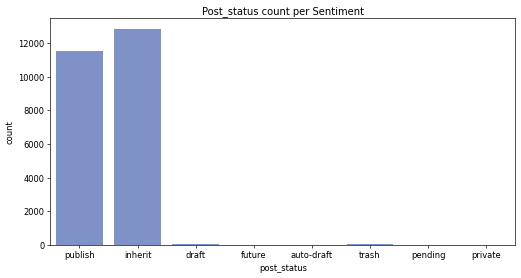

In [34]:
sns.countplot(x=df_tmp_2021['post_status'], palette=['#728CD4'])
plt.title('Post_status count per Sentiment for 2021')

Text(0.5, 1.0, 'Post_status count per Sentiment for 2020')

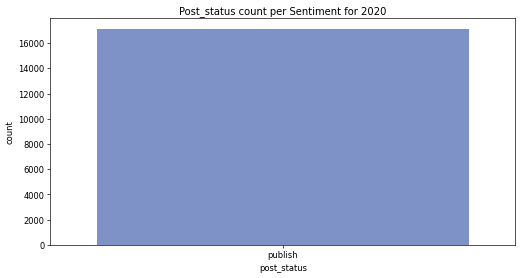

In [36]:
sns.countplot(x=df_tmp_2020['post_status'], palette=['#728CD4'])
plt.title('Post_status count per Sentiment for 2020')

Comment_status counts for 2021 and 2020

Text(0.5, 1.0, 'Comment_status count per Sentiment for 2021')

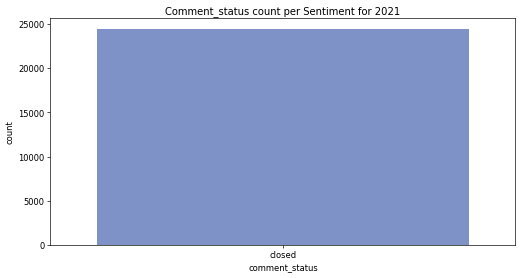

In [37]:
sns.countplot(x=df_tmp_2021['comment_status'], palette=['#728CD4'])
plt.title('Comment_status count per Sentiment for 2021')

Text(0.5, 1.0, 'Comment_status count per Sentiment for 2020')

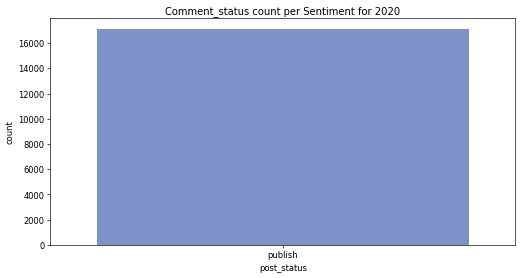

In [38]:
sns.countplot(x=df_tmp_2020['post_status'], palette=['#728CD4'])
plt.title('Comment_status count per Sentiment for 2020')

<AxesSubplot:>

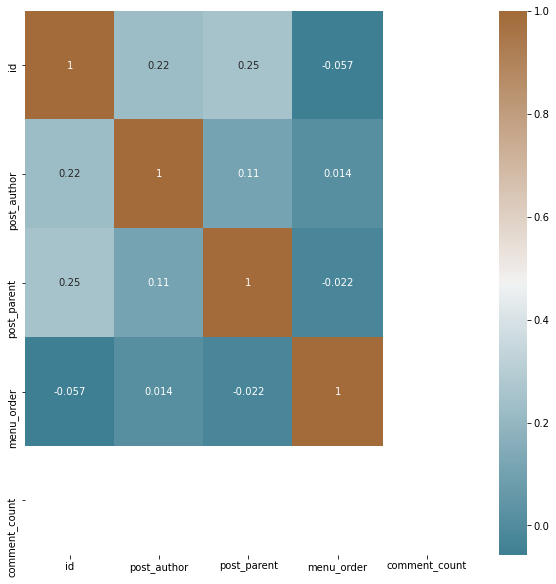

In [61]:
corr = df_tmp_2021.corr()# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 40, as_cmap=True))

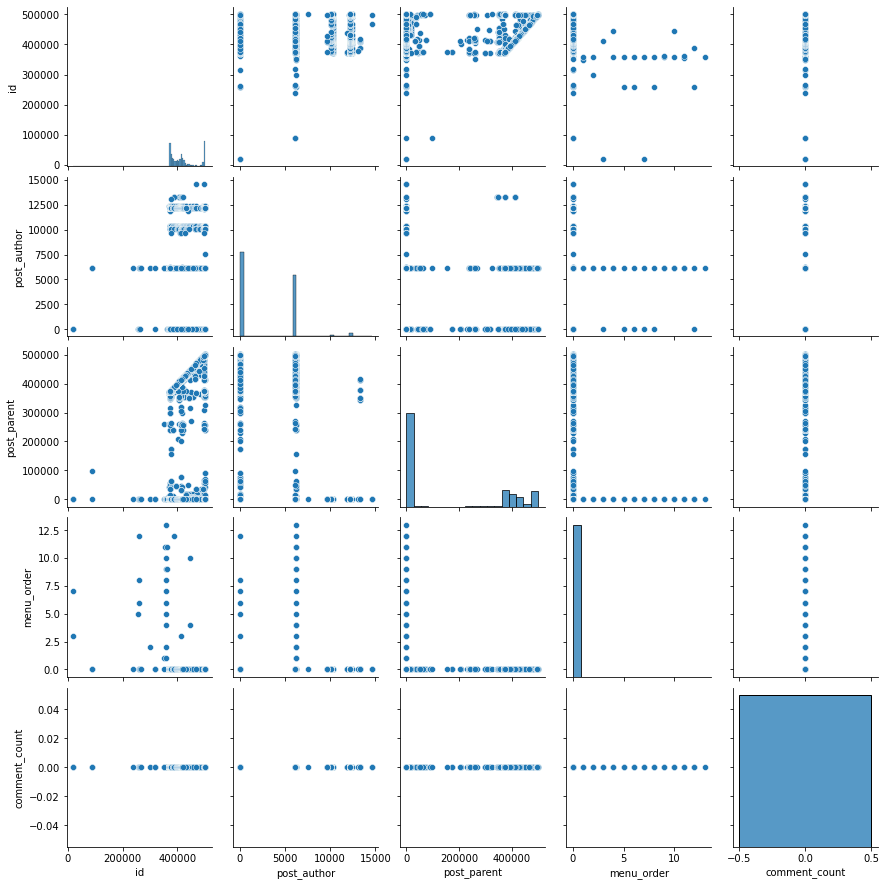

In [62]:
sns.pairplot(df_tmp_2021)

<AxesSubplot:ylabel='Frequency'>

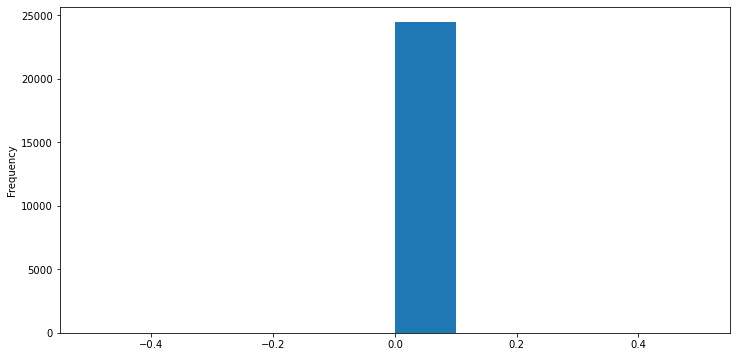

In [63]:
df_tmp_2021['comment_count'].plot(kind='hist', bins=10, figsize=(12,6))

<AxesSubplot:>

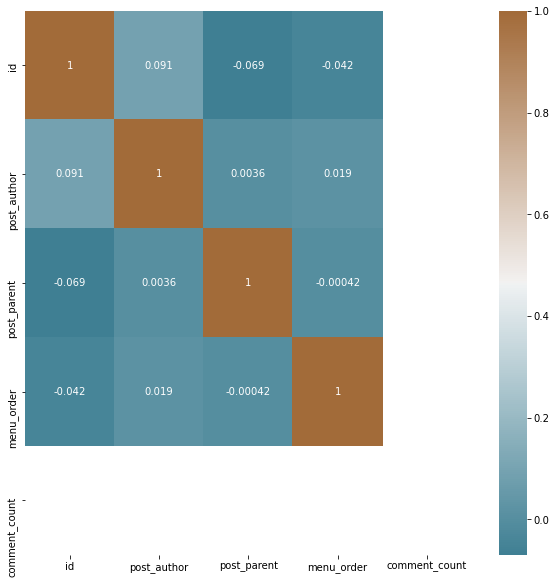

In [47]:
corr = df_tmp_2020.corr()# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 40, as_cmap=True))

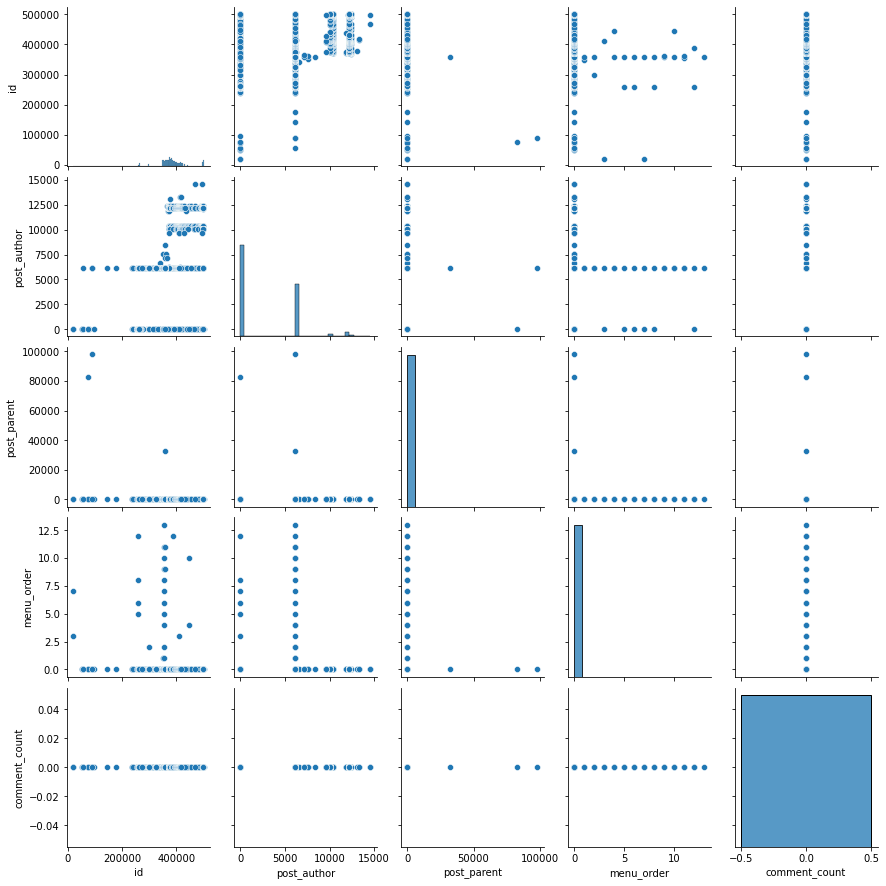

In [48]:
sns.pairplot(df_tmp_2020)

<AxesSubplot:ylabel='Frequency'>

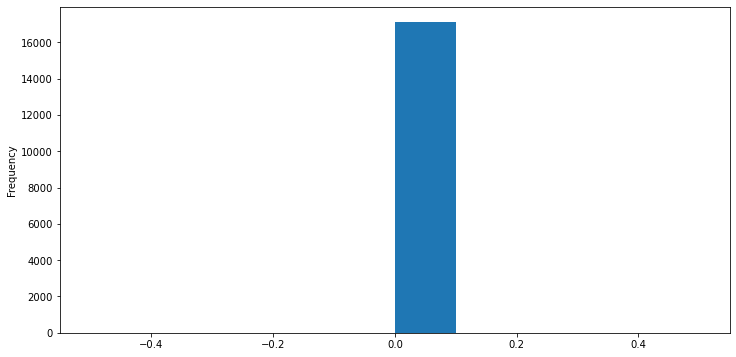

In [49]:
df_tmp_2020['comment_count'].plot(kind='hist', bins=10, figsize=(12,6))

Creating a word cloud for the titles

In [44]:
words = " ".join(title for title in df_tmp_2021.post_title)
print ("There are {} words in the combination of all titles in 2021.".format(len(text)))

There are 906124 words in the combination of all titles in 2021.


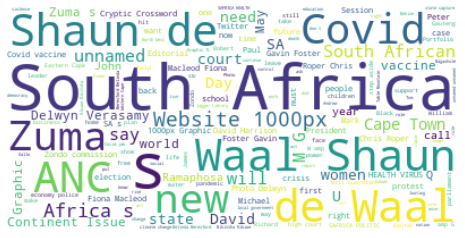

In [43]:
# Creating the wordcloud 
wordcloud = WordCloud(background_color="white").generate(text)

# Displaying the wordcloud:
# using matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
words = " ".join(title for title in df_tmp_2020.post_title)
print ("There are {} words in the combination of all titles in 2020.".format(len(words)))

There are 531688 words in the combination of all titles in 2020.


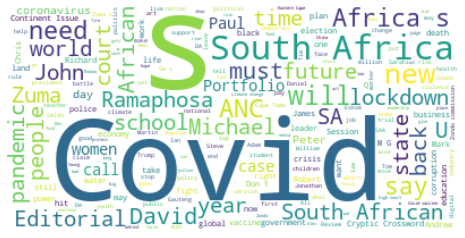

In [47]:
# Creating the wordcloud 
wordcloud = WordCloud(background_color="white").generate(words)

# Displaying the wordcloud:
# using matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

DATA CLEANING

CLEANING 2020 DATASET

In [5]:
# Converting string to lowercase
def clean_data(data):
    
    data = data.lower()
    data = re.sub('\[.*?\]','',data)
    data = re.sub('[%s]' % re.escape(string.punctuation),' ',data)
    data = re.sub('\w*\d\w*','',data)
    data = re.sub('[''""...]','',data)
    data = re.sub('\n','',data)
    data = re.sub('\t','',data)
    data = re.sub('\r','',data)
    data = re.sub(' +',' ',data)
    return data

In [6]:
stop_words = stopwords.words('english')
df_tmp_2020['post_content'] = [clean_data(i) for i in df_tmp_2020['post_content']]
df_tmp_2020['post_content'] = [word_tokenize(i) for i in df_tmp_2020['post_content']]
df_tmp_2020['post_content'] = df_tmp_2020['post_content'].apply(lambda x : [word for word in x if word not in stop_words])

In [7]:
stop_words = stopwords.words('english')
df_tmp_2020['post_excerpt'] = [clean_data(i) for i in df_tmp_2020['post_excerpt']]
df_tmp_2020['post_excerpt'] = [word_tokenize(i) for i in df_tmp_2020['post_excerpt']]
df_tmp_2020['post_excerpt'] = df_tmp_2020['post_excerpt'].apply(lambda x : [word for word in x if word not in stop_words])

In [8]:
stop_words = stopwords.words('english')
df_tmp_2020['post_title'] = [clean_data(i) for i in df_tmp_2020['post_title']]
df_tmp_2020['post_title'] = [word_tokenize(i) for i in df_tmp_2020['post_title']]
df_tmp_2020['post_title'] = df_tmp_2020['post_title'].apply(lambda x : [word for word in x if word not in stop_words])

In [15]:
stop_words = stopwords.words('english')
df_tmp_2020['post_name'] = [clean_data(i) for i in df_tmp_2020['post_name']]
df_tmp_2020['post_name'] = [word_tokenize(i) for i in df_tmp_2020['post_name']]
df_tmp_2020['post_name'] = df_tmp_2020['post_name'].apply(lambda x : [word for word in x if word not in stop_words])

In [16]:
df_tmp_2020

,id,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,...,pinged,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,267813.0,0.0,2020-02-06 01:57:38+00:00,2020-02-05 23:57:38+00:00,[unknown],[],[],publish,closed,closed,...,,2020-02-06 01:57:38+00:00,2020-02-05 23:57:38+00:00,,0.0,https://mg.co.za/article/2020-02-06-0d1d6cd736...,0,oembed_cache,,0
1,268684.0,0.0,2020-02-06 05:06:37+00:00,2020-02-06 03:06:37+00:00,[unknown],[],[],publish,closed,closed,...,,2020-02-06 05:06:37+00:00,2020-02-06 03:06:37+00:00,,0.0,https://mg.co.za/article/2020-02-06-160d666a4a...,0,oembed_cache,,0
2,267814.0,0.0,2020-02-06 01:57:39+00:00,2020-02-05 23:57:39+00:00,[unknown],[],[],publish,closed,closed,...,,2020-02-06 01:57:39+00:00,2020-02-05 23:57:39+00:00,,0.0,https://mg.co.za/article/2020-02-06-2a228caf76...,0,oembed_cache,,0
3,267738.0,0.0,2020-02-06 01:42:27+00:00,2020-02-05 23:42:27+00:00,[unknown],[],[],publish,closed,closed,...,,2020-02-06 01:42:27+00:00,2020-02-05 23:42:27+00:00,,0.0,https://mg.co.za/article/2020-02-06-329ed5f948...,0,oembed_cache,,0
4,267846.0,0.0,2020-02-06 02:06:19+00:00,2020-02-06 00:06:19+00:00,[unknown],[],[],publish,closed,closed,...,,2020-02-06 02:06:19+00:00,2020-02-06 00:06:19+00:00,,0.0,https://mg.co.za/article/2020-02-06-361932cb2b...,0,oembed_cache,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,500838.0,12197.0,2021-10-04 16:48:35+00:00,2021-10-04 14:48:35+00:00,"[wp, paragraph, dropcap, true, p, class, drop,...","[vaccine, mandate, quandary, heading, court, c...","[alan, dobson, sc, says, legislating, vaccine,...",publish,closed,closed,...,,2021-10-04 17:08:26+00:00,2021-10-04 15:08:26+00:00,,0.0,https://mg.co.za/?p=500838,0,post,,0
17104,500849.0,12197.0,2021-10-05 05:00:00+00:00,2021-10-05 03:00:00+00:00,"[wp, heading, strong, span, class, inline, col...","[usual, contenders, surprises, long, list, chi...","[embattled, western, cape, judge, president, j...",publish,closed,closed,...,,2021-10-05 10:37:17+00:00,2021-10-05 08:37:17+00:00,,0.0,https://mg.co.za/?p=500849,0,post,,0
17105,500893.0,12197.0,2021-10-05 13:09:54+00:00,2021-10-05 11:09:54+00:00,"[wp, paragraph, dropcap, true, p, class, drop,...","[jsc, interviews, concourt, round, two, better...","[acting, chief, justice, raymond, zondo, prote...",publish,closed,closed,...,,2021-10-05 15:30:11+00:00,2021-10-05 13:30:11+00:00,,0.0,https://mg.co.za/?p=500893,0,post,,0
17106,415610.0,13273.0,2021-05-19 10:02:55+00:00,2021-05-19 08:02:55+00:00,"[wp, paragraph, dropcap, true, p, class, drop,...","[mps, ’, time, deal, ‘, noise, ’, state, captu...","[zondo, commission, wanted, speaker, explain, ...",publish,closed,closed,...,,2021-06-15 21:25:09+00:00,2021-06-15 19:25:09+00:00,,0.0,https://mg.co.za/?p=415610,0,post,,0


CLEANING 2021 DATASET

In [2]:
# Converting string to lowercase
def clean_data(data):
    
    data = data.lower()
    data = re.sub('\[.*?\]','',data)
    data = re.sub('[%s]' % re.escape(string.punctuation),' ',data)
    data = re.sub('\w*\d\w*','',data)
    data = re.sub('[''""...]','',data)
    data = re.sub('\n','',data)
    data = re.sub('\t','',data)
    data = re.sub('\r','',data)
    data = re.sub(' +',' ',data)
    return data

In [18]:
stop_words = stopwords.words('english')
df_tmp_2021['post_content'] = [clean_data(i) for i in df_tmp_2021['post_content']]
df_tmp_2021['post_content'] = [word_tokenize(i) for i in df_tmp_2021['post_content']]
df_tmp_2021['post_content'] = df_tmp_2021['post_content'].apply(lambda x : [word for word in x if word not in stop_words])

In [19]:
stop_words = stopwords.words('english')
df_tmp_2021['post_excerpt'] = [clean_data(i) for i in df_tmp_2021['post_excerpt']]
df_tmp_2021['post_excerpt'] = [word_tokenize(i) for i in df_tmp_2021['post_excerpt']]
df_tmp_2021['post_excerpt'] = df_tmp_2021['post_excerpt'].apply(lambda x : [word for word in x if word not in stop_words])

In [20]:
stop_words = stopwords.words('english')
df_tmp_2021['post_title'] = [clean_data(i) for i in df_tmp_2021['post_title']]
df_tmp_2021['post_title'] = [word_tokenize(i) for i in df_tmp_2021['post_title']]
df_tmp_2021['post_title'] = df_tmp_2021['post_title'].apply(lambda x : [word for word in x if word not in stop_words])

In [21]:
stop_words = stopwords.words('english')
df_tmp_2021['post_name'] = [clean_data(i) for i in df_tmp_2021['post_name']]
df_tmp_2021['post_name'] = [word_tokenize(i) for i in df_tmp_2021['post_name']]
df_tmp_2021['post_name'] = df_tmp_2021['post_name'].apply(lambda x : [word for word in x if word not in stop_words])

In [3]:
df_tmp_2020

NameError: name 'df_tmp_2020' is not defined